![imagen](./img/Exploración_Pokémon.jpg)

### Exploración Pokémon: Descifrando Secretos a Través de los Datos

El título 'Exploración Pokémon: Descifrando Secretos a Través de los Datos' sugiere una exploración en profundidad del universo Pokémon utilizando técnicas de análisis de datos. El tema aborda la aplicación de análisis de datos para descubrir patrones, tendencias y secretos ocultos dentro del vasto conjunto de datos de Pokémon. Esto puede incluir la comprensión de la distribución de tipos de Pokémon, la identificación de Pokémon legendarios o poderosos en función de sus estadísticas, el análisis de la frecuencia de aparición de ciertos tipos de Pokémon en diferentes generaciones, entre otros aspectos. En resumen, la exploración Pokémon a través de datos busca arrojar luz sobre diversos aspectos del mundo Pokémon utilizando herramientas analíticas para revelar información significativa y fascinante.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [1]:
# Librerias
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tools.squarify_plots_utils import treemap


In [2]:
# Dataset 
pkmn = pd.read_csv("./data/pokemon_actualizado.csv")

In [3]:
# Configurar pandas para que no trunque la visualización
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.max_colwidth", None)  # Mostrar todo el contenido de las celdas, si es posible

In [7]:
pkmn.set_index("pokedex_number", inplace=True)

In [8]:
pkmn.head(20)

,abilities,attack,base_total,capture_rate,defense,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,num_abilities,type
pokedex_number,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",49,318,45,49,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,1,Non-legendary,2,grass_poison
2,"['Overgrow', 'Chlorophyll']",62,405,45,63,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,1,Non-legendary,2,grass_poison
3,"['Overgrow', 'Chlorophyll']",100,625,45,123,2.0,80,Venusaur,122,120,80,grass,poison,100.0,1,Non-legendary,2,grass_poison
4,"['Blaze', 'Solar Power']",52,309,45,43,0.6,39,Charmander,60,50,65,fire,NaN,8.5,1,Non-legendary,2,fire
5,"['Blaze', 'Solar Power']",64,405,45,58,1.1,58,Charmeleon,80,65,80,fire,NaN,19.0,1,Non-legendary,2,fire
6,"['Blaze', 'Solar Power']",104,634,45,78,1.7,78,Charizard,159,115,100,fire,flying,90.5,1,Non-legendary,2,fire_flying
7,"['Torrent', 'Rain Dish']",48,314,45,65,0.5,44,Squirtle,50,64,43,water,NaN,9.0,1,Non-legendary,2,water
8,"['Torrent', 'Rain Dish']",63,405,45,80,1.0,59,Wartortle,65,80,58,water,NaN,22.5,1,Non-legendary,2,water
9,"['Torrent', 'Rain Dish']",103,630,45,120,1.6,79,Blastoise,135,115,78,water,NaN,85.5,1,Non-legendary,2,water


In [9]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 1 to 801
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   abilities      801 non-null    object 
 1   attack         801 non-null    int64  
 2   base_total     801 non-null    int64  
 3   capture_rate   801 non-null    int64  
 4   defense        801 non-null    int64  
 5   height_m       801 non-null    float64
 6   hp             801 non-null    int64  
 7   name           801 non-null    object 
 8   sp_attack      801 non-null    int64  
 9   sp_defense     801 non-null    int64  
 10  speed          801 non-null    int64  
 11  type1          801 non-null    object 
 12  type2          417 non-null    object 
 13  weight_kg      801 non-null    float64
 14  generation     801 non-null    int64  
 15  is_legendary   801 non-null    object 
 16  num_abilities  801 non-null    int64  
 17  type           801 non-null    object 
dtypes: float64(2), 

In [10]:
porcentaje_nulo = pkmn.isnull().mean() * 100
print(porcentaje_nulo[porcentaje_nulo > 0])

type2    47.940075
dtype: float64


In [11]:
pkmn.describe().T

,count,mean,std,min,25%,50%,75%,max
attack,801.0,77.857678,32.158820,5.0,55.0,75.0,100.0,185.0
base_total,801.0,428.377029,119.203577,180.0,320.0,435.0,505.0,780.0
capture_rate,801.0,98.956305,76.409828,3.0,45.0,60.0,170.0,255.0
defense,801.0,73.008739,30.769159,5.0,50.0,70.0,90.0,230.0
height_m,801.0,1.155556,1.069952,0.1,0.6,1.0,1.5,14.5
hp,801.0,68.958801,26.576015,1.0,50.0,65.0,80.0,255.0
sp_attack,801.0,71.305868,32.353826,10.0,45.0,65.0,91.0,194.0
sp_defense,801.0,70.911361,27.942501,20.0,50.0,66.0,90.0,230.0
speed,801.0,66.334582,28.907662,5.0,45.0,65.0,85.0,180.0
weight_kg,801.0,60.941199,108.514597,0.1,9.0,27.3,63.0,999.9


In [12]:
pkmn["generation"].value_counts()

generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64

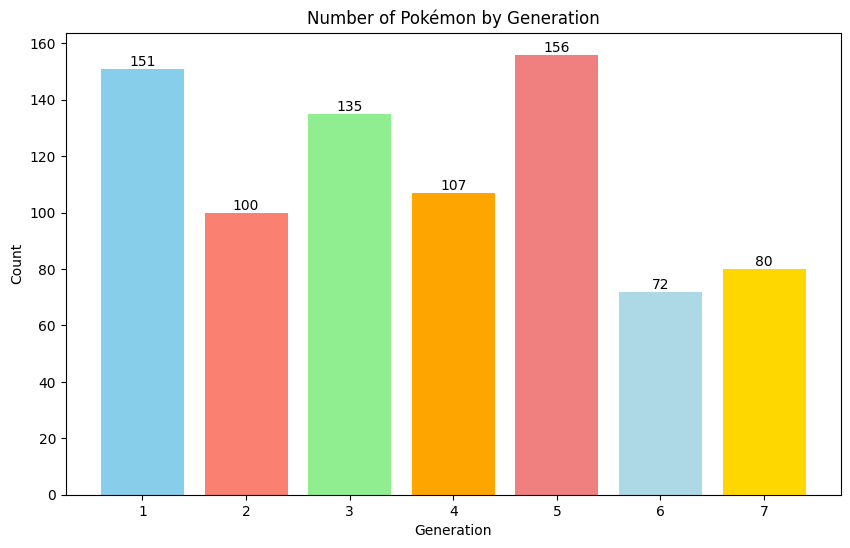

In [40]:
# Contar el número de Pokémon en cada generación y asignar un color único a cada generación
generation_counts = pkmn["generation"].value_counts().sort_index()
colors = ["skyblue", "salmon", "lightgreen", "orange", "lightcoral", "lightblue", "gold"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(generation_counts.index, generation_counts.values, color=colors)

# Añadir los valores en las barras
for bar, value in zip(bars, generation_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha="center", va="bottom")

# Añadir título y etiquetas de ejes
plt.title("Number of Pokémon by Generation")
plt.xlabel("Generation")
plt.ylabel("Count")

# Rotar los números del eje x
plt.xticks(rotation="horizontal")

# Mostrar el gráfico
plt.show()

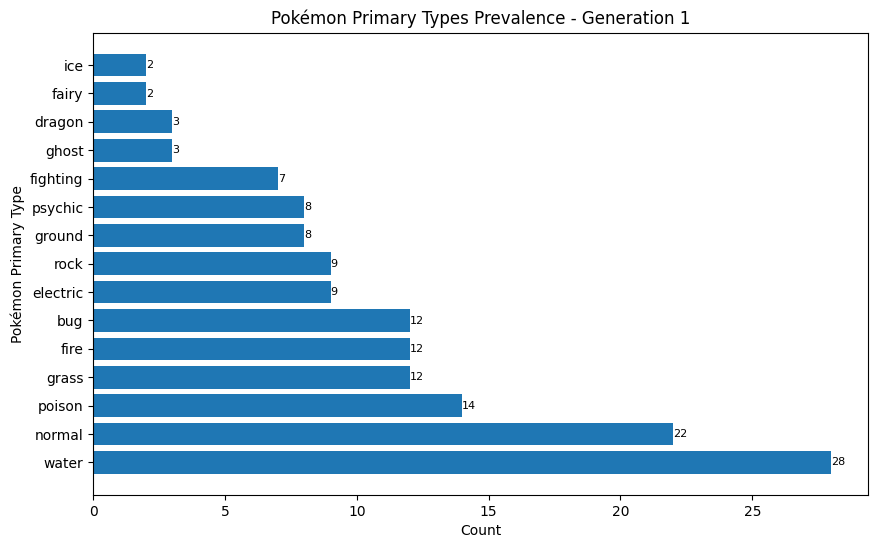

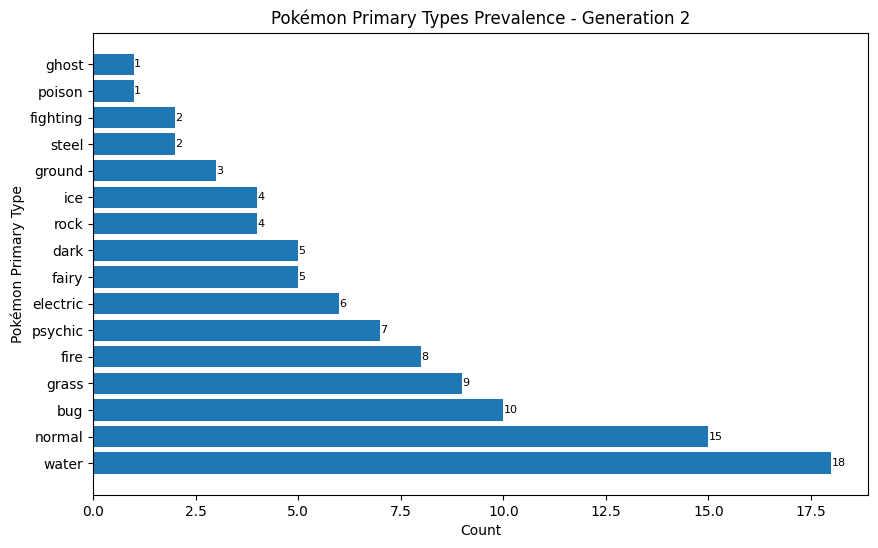

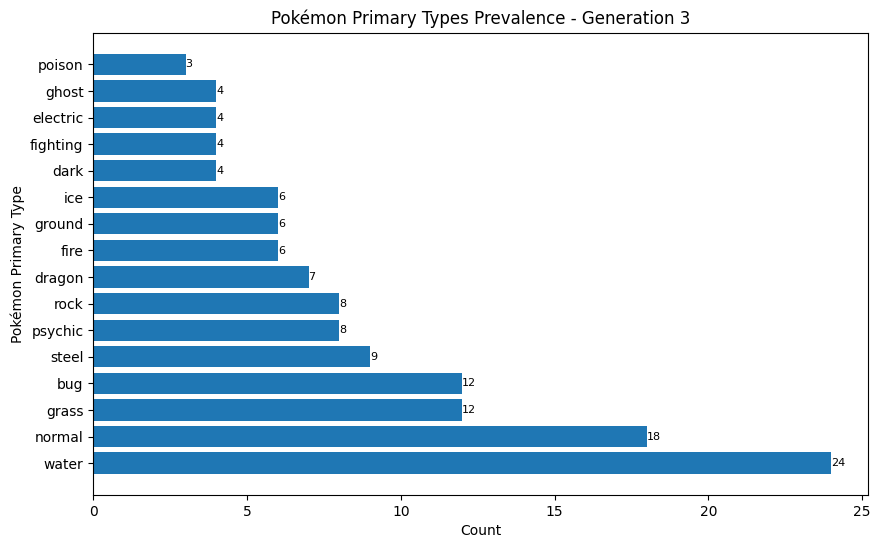

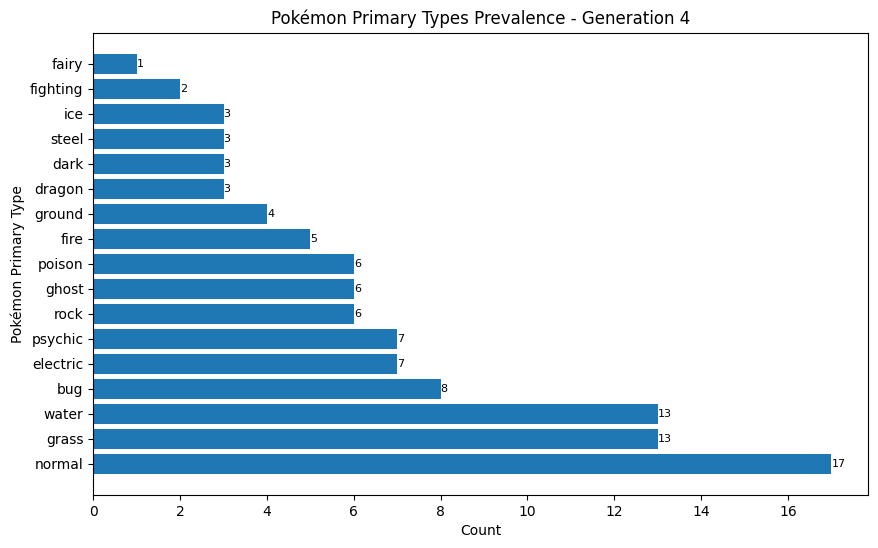

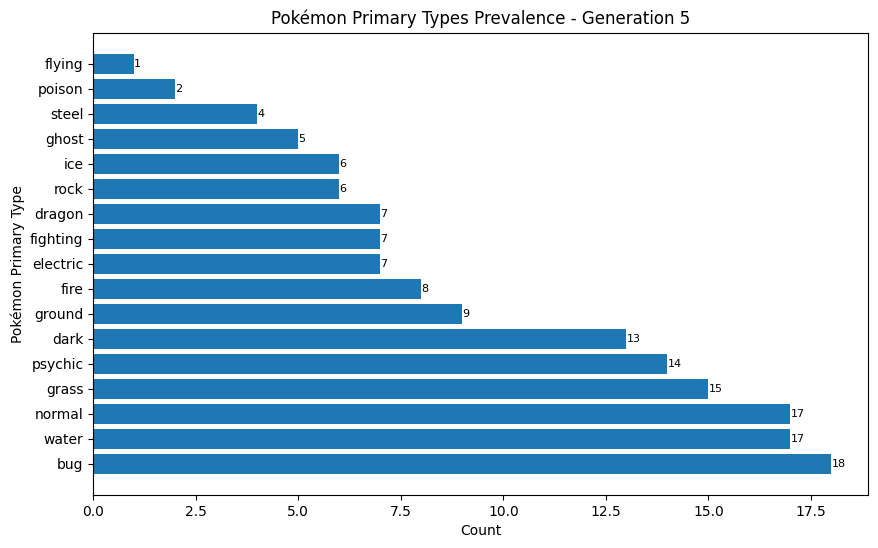

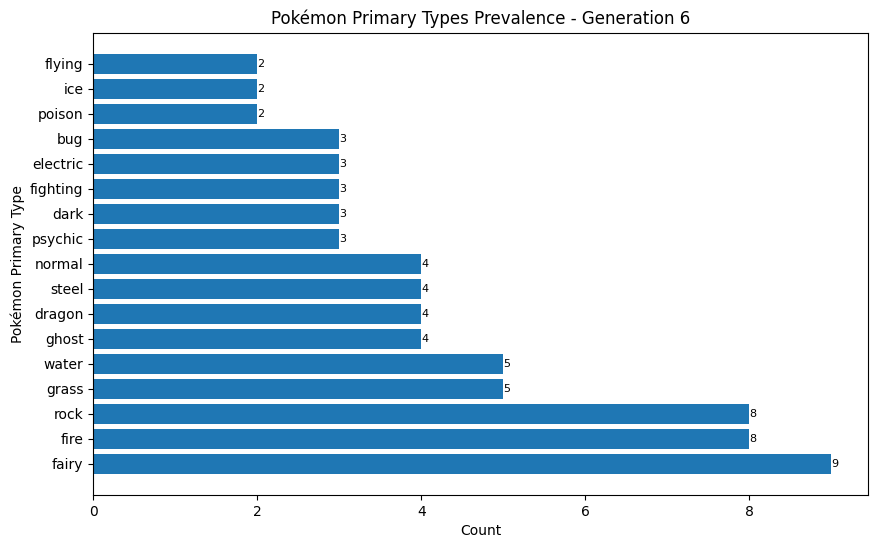

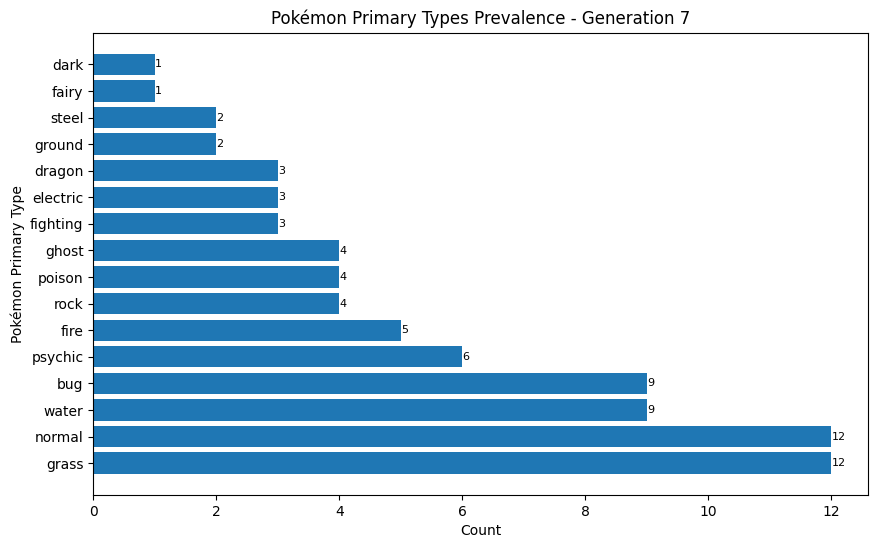

In [15]:
# Obtener las generaciones únicas
generations = pkmn["generation"].unique()

# Crear un gráfico de barras para cada generación
for generation in generations:
    # Filtrar el DataFrame por generación
    generation_df = pkmn[pkmn["generation"] == generation]
    
    # Contar los valores de la columna "type1"
    type1_counts = generation_df["type1"].value_counts()
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(type1_counts.index, type1_counts.values)
    
    # Añadir título y etiquetas de ejes
    plt.title(f"Pokémon Primary Types Prevalence - Generation {generation}")
    plt.xlabel("Count")
    plt.ylabel("Pokémon Primary Type")
    
    # Añadir etiquetas con los valores en cada barra
    for i, v in enumerate(type1_counts.values):
        plt.text(v, i, str(v), ha="left", va="center", color="black", fontsize=8)
    
    # Mostrar el gráfico
    plt.show()

In [17]:
# Obtener las generaciones únicas
generations = pkmn["generation"].unique()

# Crear un diccionario para almacenar los Pokémon de cada tipo en cada generación
pokemon_by_type_and_generation = {}

# Iterar sobre cada generación
for generation in generations:
    # Filtrar el DataFrame por generación
    generation_df = pkmn[pkmn["generation"] == generation]
    
    # Obtener los tipos únicos en esta generación
    unique_types = generation_df["type1"].unique()
    
    # Crear una entrada en el diccionario para esta generación
    pokemon_by_type_and_generation[generation] = {}
    
    # Iterar sobre cada tipo en esta generación
    for type_ in unique_types:
        # Filtrar el DataFrame por tipo en esta generación
        type_df = generation_df[generation_df["type1"] == type_]
        
        # Obtener los Pokémon de este tipo en esta generación
        pokemon_list = type_df["name"].tolist()
        
        # Agregar la lista de Pokémon al diccionario
        pokemon_by_type_and_generation[generation][type_] = pokemon_list

# Imprimir el diccionario
for generation, types_dict in pokemon_by_type_and_generation.items():
    print(f"Generación {generation}:")
    for type_, pokemon_list in types_dict.items():
        print(f"  Tipo {type_}: {', '.join(pokemon_list)}")

Generación 1:
  Tipo grass: Bulbasaur, Ivysaur, Venusaur, Oddish, Gloom, Vileplume, Bellsprout, Weepinbell, Victreebel, Exeggcute, Exeggutor, Tangela
  Tipo fire: Charmander, Charmeleon, Charizard, Vulpix, Ninetales, Growlithe, Arcanine, Ponyta, Rapidash, Magmar, Flareon, Moltres
  Tipo water: Squirtle, Wartortle, Blastoise, Psyduck, Golduck, Poliwag, Poliwhirl, Poliwrath, Tentacool, Tentacruel, Slowpoke, Slowbro, Seel, Dewgong, Shellder, Cloyster, Krabby, Kingler, Horsea, Seadra, Goldeen, Seaking, Staryu, Starmie, Magikarp, Gyarados, Lapras, Vaporeon
  Tipo bug: Caterpie, Metapod, Butterfree, Weedle, Kakuna, Beedrill, Paras, Parasect, Venonat, Venomoth, Scyther, Pinsir
  Tipo normal: Pidgey, Pidgeotto, Pidgeot, Rattata, Raticate, Spearow, Fearow, Jigglypuff, Wigglytuff, Meowth, Persian, Farfetch'd, Doduo, Dodrio, Lickitung, Chansey, Kangaskhan, Tauros, Ditto, Eevee, Porygon, Snorlax
  Tipo poison: Ekans, Arbok, Nidoran♀, Nidorina, Nidoqueen, Nidoran♂, Nidorino, Nidoking, Zubat, Golbat

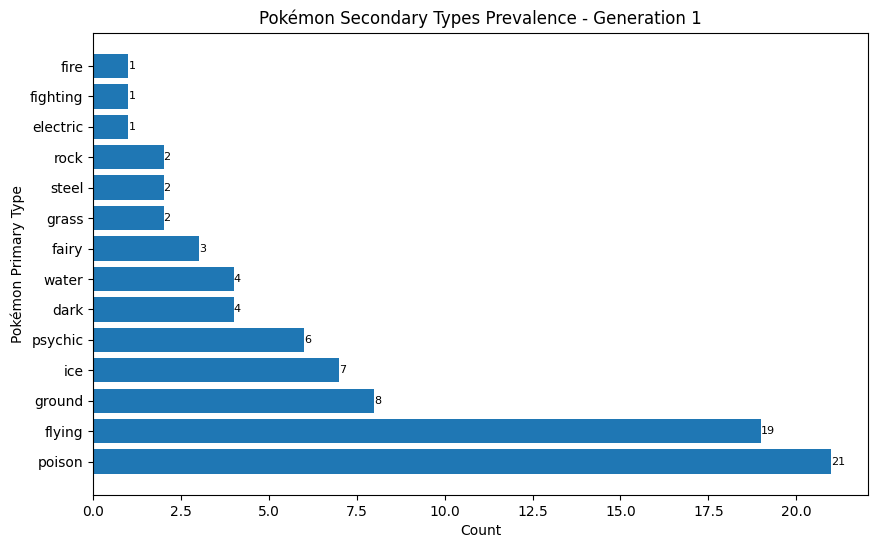

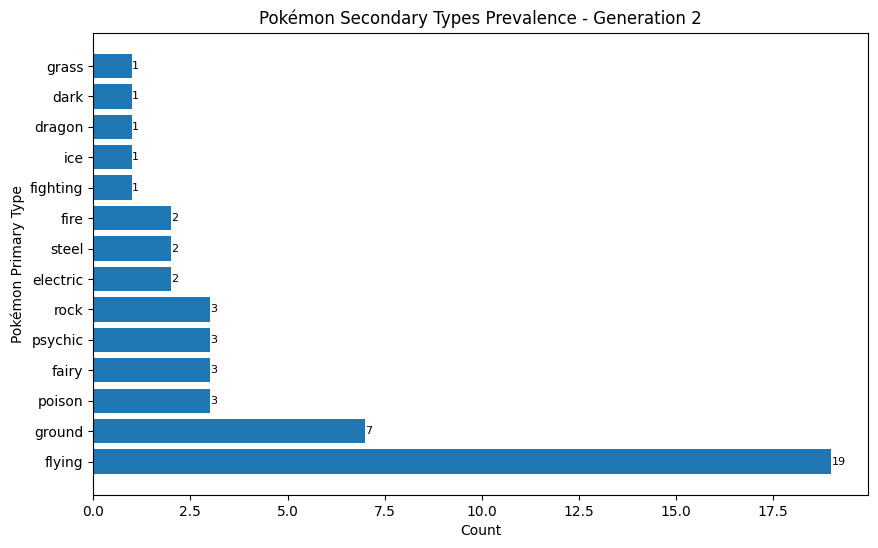

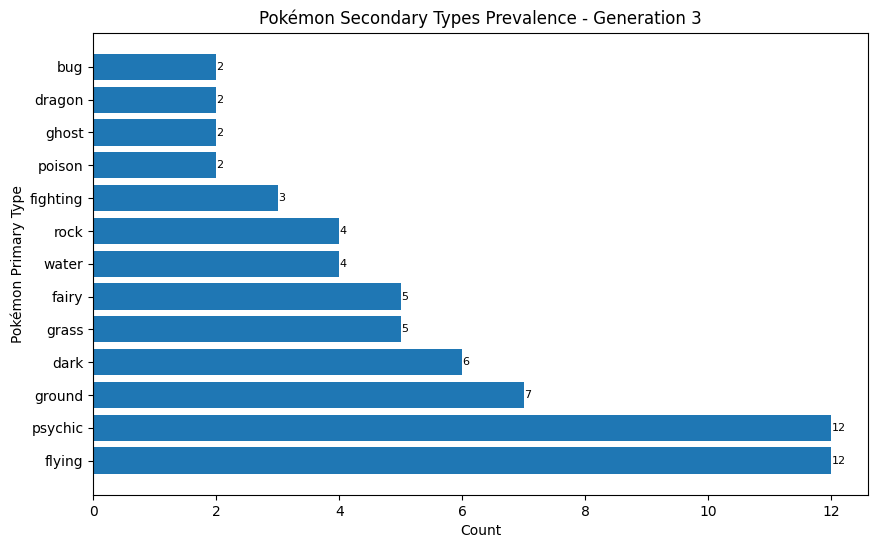

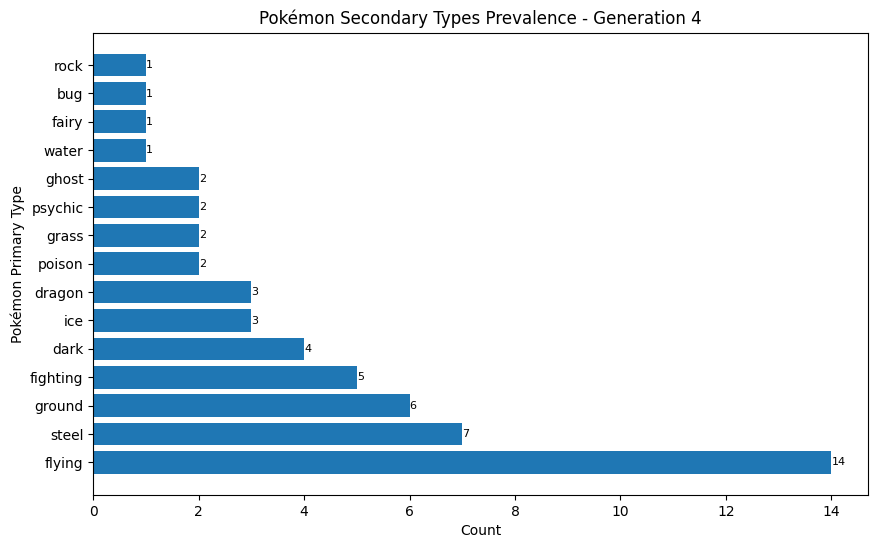

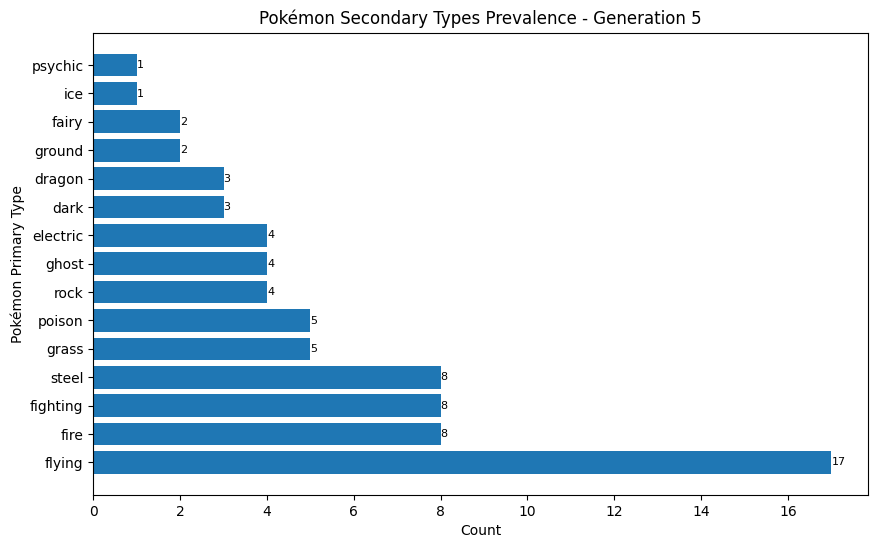

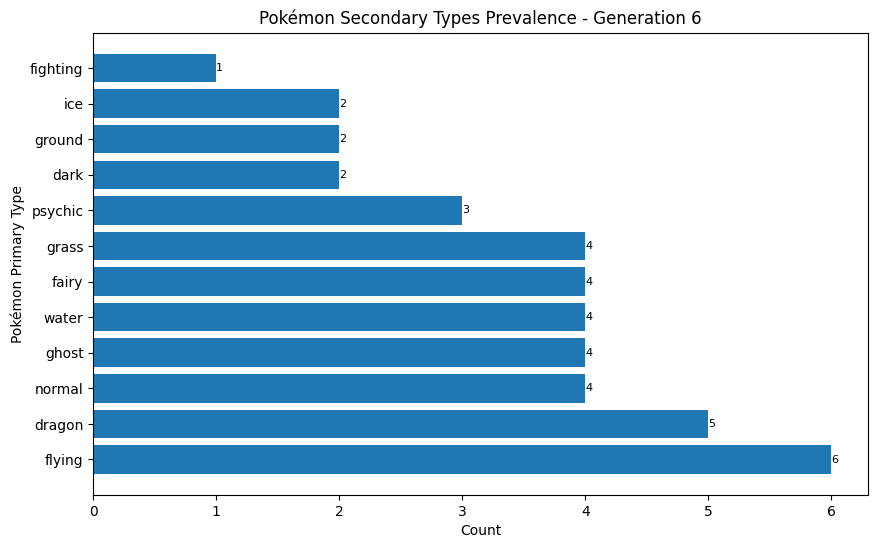

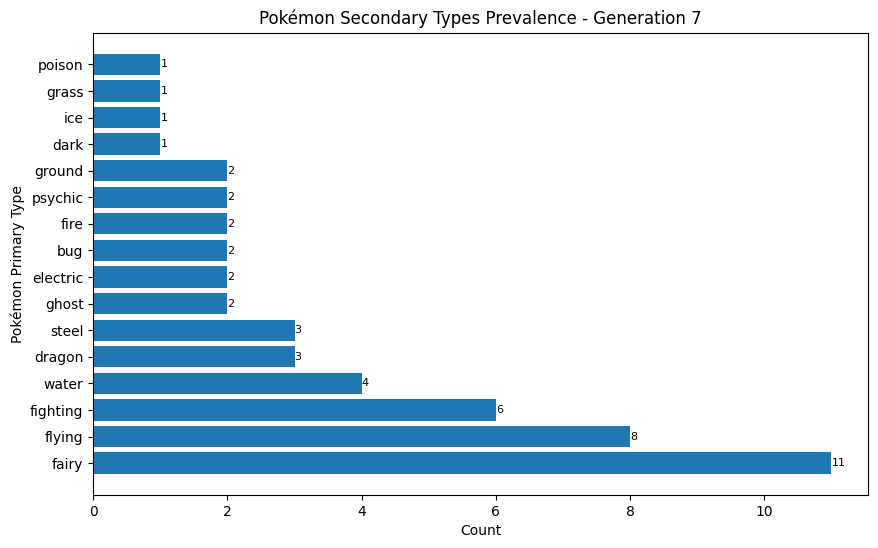

In [18]:
# Obtener las generaciones únicas
generations = pkmn["generation"].unique()

# Crear un gráfico de barras para cada generación
for generation in generations:
    # Filtrar el DataFrame por generación
    generation_df = pkmn[pkmn["generation"] == generation]
    
    # Contar los valores de la columna "type1"
    type1_counts = generation_df["type2"].value_counts()
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(type1_counts.index, type1_counts.values)
    
    # Añadir título y etiquetas de ejes
    plt.title(f"Pokémon Secondary Types Prevalence - Generation {generation}")
    plt.xlabel("Count")
    plt.ylabel("Pokémon Primary Type")
    
    # Añadir etiquetas con los valores en cada barra
    for i, v in enumerate(type1_counts.values):
        plt.text(v, i, str(v), ha="left", va="center", color="black", fontsize=8)
    
    # Mostrar el gráfico
    plt.show()

In [20]:
# Obtener las generaciones únicas
generations = pkmn["generation"].unique()

# Crear un diccionario para almacenar los Pokémon de cada tipo en cada generación
pokemon_by_type_and_generation = {}

# Iterar sobre cada generación
for generation in generations:
    # Filtrar el DataFrame por generación
    generation_df = pkmn[pkmn["generation"] == generation]
    
    # Obtener los tipos únicos en esta generación
    unique_types = generation_df["type2"].unique()
    
    # Crear una entrada en el diccionario para esta generación
    pokemon_by_type_and_generation[generation] = {}
    
    # Iterar sobre cada tipo en esta generación
    for type_ in unique_types:
        # Filtrar el DataFrame por tipo en esta generación
        type_df = generation_df[generation_df["type2"] == type_]
        
        # Obtener los Pokémon de este tipo en esta generación
        pokemon_list = type_df["name"].tolist()
        
        # Agregar la lista de Pokémon al diccionario
        pokemon_by_type_and_generation[generation][type_] = pokemon_list

# Imprimir el diccionario
for generation, types_dict in pokemon_by_type_and_generation.items():
    print(f"Generación {generation}:")
    for type_, pokemon_list in types_dict.items():
        print(f"  Tipo {type_}: {', '.join(pokemon_list)}")

Generación 1:
  Tipo poison: Bulbasaur, Ivysaur, Venusaur, Weedle, Kakuna, Beedrill, Oddish, Gloom, Vileplume, Venonat, Venomoth, Bellsprout, Weepinbell, Victreebel, Tentacool, Tentacruel, Grimer, Muk, Gastly, Haunter, Gengar
  Tipo nan: 
  Tipo flying: Charizard, Butterfree, Pidgey, Pidgeotto, Pidgeot, Spearow, Fearow, Zubat, Golbat, Farfetch'd, Doduo, Dodrio, Scyther, Gyarados, Aerodactyl, Articuno, Zapdos, Moltres, Dragonite
  Tipo dark: Rattata, Raticate, Meowth, Persian
  Tipo electric: Raichu
  Tipo ice: Sandshrew, Sandslash, Vulpix, Ninetales, Dewgong, Cloyster, Lapras
  Tipo ground: Nidoqueen, Nidoking, Diglett, Dugtrio, Geodude, Graveler, Golem, Onix
  Tipo fairy: Jigglypuff, Wigglytuff, Mr. Mime
  Tipo grass: Paras, Parasect
  Tipo fighting: Poliwrath
  Tipo psychic: Slowpoke, Slowbro, Exeggcute, Exeggutor, Starmie, Jynx
  Tipo steel: Magnemite, Magneton
  Tipo fire: Marowak
  Tipo rock: Rhyhorn, Rhydon
  Tipo water: Omanyte, Omastar, Kabuto, Kabutops
Generación 2:
  Tipo nan

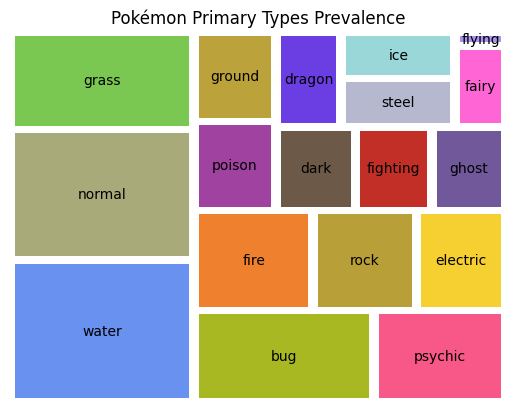

In [21]:
type1_value_counts = pkmn["type1"].value_counts()

treemap(
    type1_value_counts,
    "Pokémon Primary Types Prevalence",
    label=type1_value_counts.index,
    color=[
        "#6991F0",
        "#A8AA79",
        "#7AC852",
        "#A7B822",
        "#F85887",
        "#EF812E",
        "#B99F38",
        "#F6D030",
        "#A0429F",
        "#BCA23B",
        "#6D5947",
        "#C12F27",
        "#70589A",
        "#6B3EE3",
        "#B6B8D0",
        "#9AD7D9",
        "#FF65D5",
        "#A991F0",
    ],
    pad=1,
    text_kwargs={"color": "black"},
)

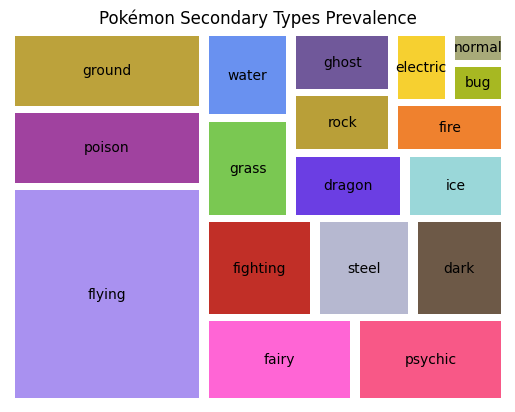

In [22]:
type2_value_counts = pkmn["type2"].value_counts()

treemap(
    type2_value_counts,
    "Pokémon Secondary Types Prevalence",
    label=type2_value_counts.index,
    color=[
        "#A991F0",
        "#A0429F",
        "#BCA23B",
        "#FF65D5",
        "#F85887",
        "#C12F27",
        "#B6B8D0",
        "#6D5947",
        "#7AC852",
        "#6991F0",
        "#6B3EE3",
        "#9AD7D9",
        "#B99F38",
        "#70589A",
        "#EF812E",
        "#F6D030",
        "#A7B822",
        "#A8AA79",
    ],
    pad=1,
    text_kwargs={"color": "black"},
)

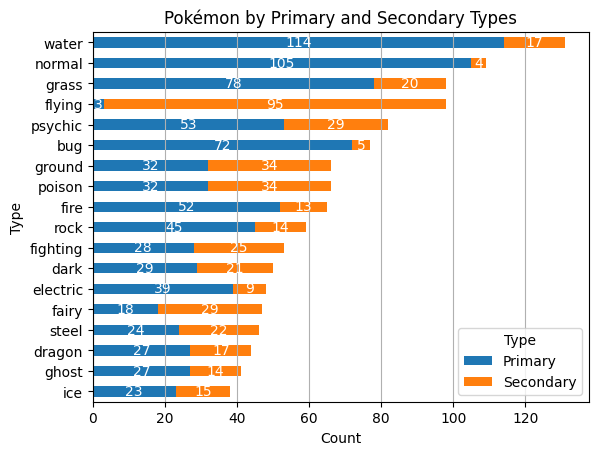

In [23]:
# Obtener los valores de conteo de los tipos primarios y secundarios
type1_counts = pkmn["type1"].value_counts()
type2_counts = pkmn["type2"].value_counts()

# Combinar los conteos de los tipos primarios y secundarios en un solo DataFrame
types_df = pd.concat([type1_counts, type2_counts], axis=1).fillna(0)
types_df.columns = ["Primary", "Secondary"]

# Ordenar el DataFrame por la suma de las columnas
types_df["Total"] = types_df["Primary"] + types_df["Secondary"]
types_df.sort_values(by="Total", ascending=True, inplace=True)

# Crear el gráfico de barras horizontal
ax = types_df[["Primary", "Secondary"]].plot(kind="barh", stacked=True)
plt.title("Pokémon by Primary and Secondary Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.legend(title="Type", loc="lower right")

# Agregar etiquetas de cantidad en cada barra
for i, (p, s) in enumerate(zip(types_df["Primary"], types_df["Secondary"])):
    ax.text(p / 2, i, str(int(p)), ha="center", va="center", color="white")
    ax.text(p + s / 2, i, str(int(s)), ha="center", va="center", color="white")

plt.grid(axis="x")
plt.show()

In [24]:
type1_counts

type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [25]:
type2_counts

type2
flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: count, dtype: int64

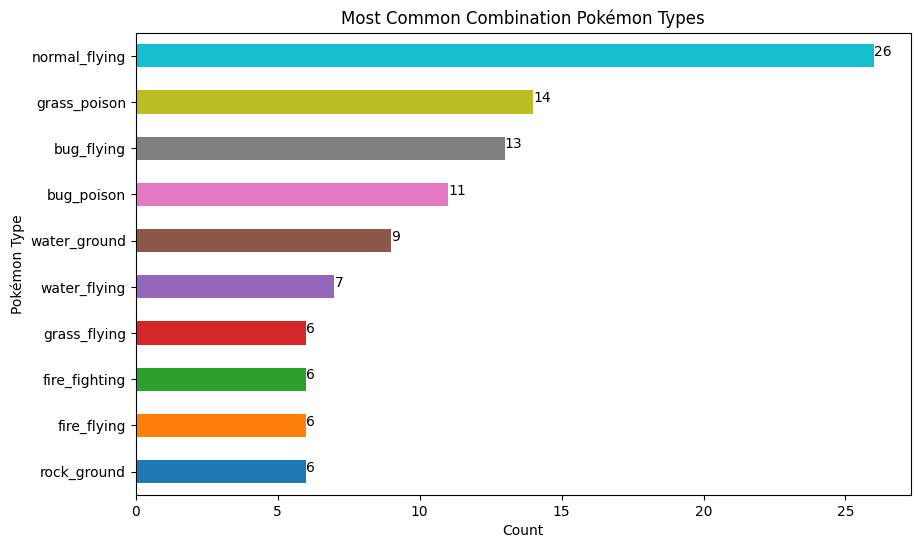

In [26]:
# Filtrar el DataFrame para incluir solo las filas donde "type2" no sea nulo
filtered_df = pkmn.dropna(subset=["type2"])

# Combinar las columnas "type" y "type2" para obtener la combinación de tipos
combined_types = filtered_df["type"]

# Contar la frecuencia de cada combinación de tipos
type_counts = combined_types.value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
type_counts.sort_values(ascending=True).plot(kind="barh", color=plt.cm.tab10(range(len(type_counts))))

# Añadir título y etiquetas de ejes
plt.title("Most Common Combination Pokémon Types")
plt.xlabel("Count")
plt.ylabel("Pokémon Type")

# Mostrar el recuento de cada barra
for index, value in enumerate(type_counts.sort_values(ascending=True)):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.show()

In [28]:
# Obtener las generaciones únicas
generations = pkmn["generation"].unique()

# Crear un diccionario para almacenar los Pokémon de cada tipo en cada generación
pokemon_by_type_and_generation = {}

# Iterar sobre cada generación
for generation in generations:
    # Filtrar el DataFrame por generación
    generation_df = pkmn[pkmn["generation"] == generation]
    
    # Obtener los tipos únicos en esta generación
    unique_types = generation_df["type"].unique()
    
    # Crear una entrada en el diccionario para esta generación
    pokemon_by_type_and_generation[generation] = {}
    
    # Iterar sobre cada tipo en esta generación
    for type_ in unique_types:
        # Filtrar el DataFrame por tipo en esta generación
        type_df = generation_df[generation_df["type"] == type_]
        
        # Obtener los Pokémon de este tipo en esta generación
        pokemon_list = type_df["name"].tolist()
        
        # Agregar la lista de Pokémon al diccionario
        pokemon_by_type_and_generation[generation][type_] = pokemon_list

# Imprimir el diccionario
for generation, types_dict in pokemon_by_type_and_generation.items():
    print(f"Generación {generation}:")
    for type_, pokemon_list in types_dict.items():
        print(f"  Tipo {type_}: {', '.join(pokemon_list)}")

Generación 1:
  Tipo grass_poison: Bulbasaur, Ivysaur, Venusaur, Oddish, Gloom, Vileplume, Bellsprout, Weepinbell, Victreebel
  Tipo fire: Charmander, Charmeleon, Growlithe, Arcanine, Ponyta, Rapidash, Magmar, Flareon
  Tipo fire_flying: Charizard, Moltres
  Tipo water: Squirtle, Wartortle, Blastoise, Psyduck, Golduck, Poliwag, Poliwhirl, Seel, Shellder, Krabby, Kingler, Horsea, Seadra, Goldeen, Seaking, Staryu, Magikarp, Vaporeon
  Tipo bug: Caterpie, Metapod, Pinsir
  Tipo bug_flying: Butterfree, Scyther
  Tipo bug_poison: Weedle, Kakuna, Beedrill, Venonat, Venomoth
  Tipo normal_flying: Pidgey, Pidgeotto, Pidgeot, Spearow, Fearow, Farfetch'd, Doduo, Dodrio
  Tipo normal_dark: Rattata, Raticate, Meowth, Persian
  Tipo poison: Ekans, Arbok, Nidoran♀, Nidorina, Nidoran♂, Nidorino, Koffing, Weezing
  Tipo electric: Pikachu, Voltorb, Electrode, Electabuzz, Jolteon
  Tipo electric_electric: Raichu
  Tipo ground_ice: Sandshrew, Sandslash
  Tipo poison_ground: Nidoqueen, Nidoking
  Tipo fai

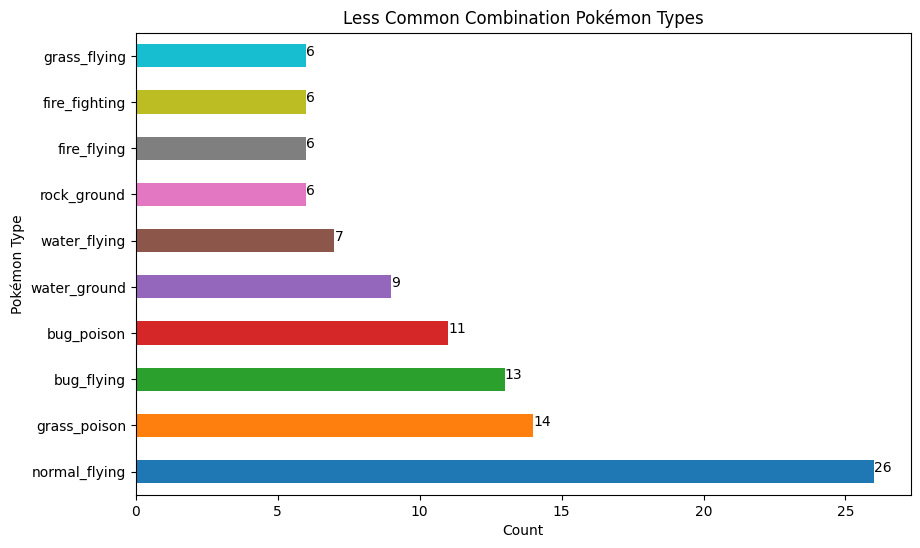

In [29]:
# Filtrar el DataFrame para incluir solo las filas donde "type2" no sea nulo
filtered_df = pkmn.dropna(subset=["type2"])

# Combinar las columnas "type" y "type2" para obtener la combinación de tipos
combined_types = filtered_df["type"]

# Contar la frecuencia de cada combinación de tipos
type_counts = combined_types.value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
type_counts.sort_values(ascending=False).plot(kind="barh", color=plt.cm.tab10(range(len(type_counts))))

# Añadir título y etiquetas de ejes
plt.title("Less Common Combination Pokémon Types")
plt.xlabel("Count")
plt.ylabel("Pokémon Type")

# Mostrar el recuento de cada barra
for index, value in enumerate(type_counts.sort_values(ascending=False)):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.show()

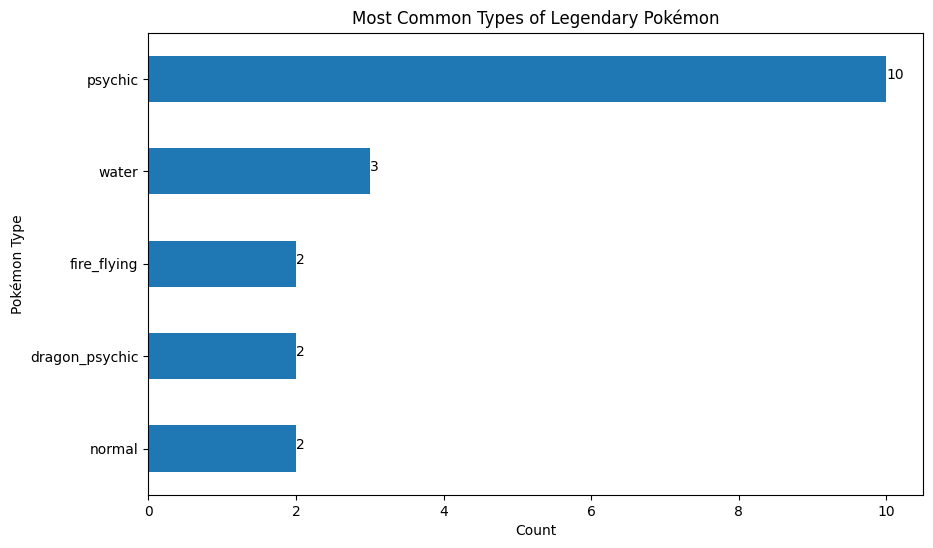

In [30]:
# Filtrar el DataFrame para incluir solo Pokémon legendarios
legendary_pokemon = pkmn[pkmn["is_legendary"] == "Legendary"]

# Contar la frecuencia de cada tipo de Pokémon legendario
type_counts = legendary_pokemon["type"].value_counts().head(5)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
type_counts.sort_values().plot(kind="barh")

# Añadir título y etiquetas de ejes
plt.title("Most Common Types of Legendary Pokémon")
plt.xlabel("Count")
plt.ylabel("Pokémon Type")

# Mostrar el recuento de cada barra
for index, value in enumerate(type_counts.sort_values()):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.show()

In [31]:
# Filtrar el DataFrame para incluir solo Pokémon legendarios
legendary_pokemon = pkmn[pkmn["is_legendary"] == "Legendary"]

# Contar la frecuencia de cada tipo de Pokémon legendario
type_counts = legendary_pokemon["type"].value_counts().head(5)

# Obtener los nombres de los Pokémon que pertenecen a los tipos más comunes
common_types = type_counts.index

# Crear una lista para almacenar los nombres de los Pokémon
pokemon_info = []

# Iterar sobre los tipos comunes
for type_name in common_types:
    # Filtrar los Pokémon legendarios que pertenecen al tipo actual
    pokemon_of_type = legendary_pokemon[legendary_pokemon["type"] == type_name]
    # Obtener los nombres de los Pokémon de ese tipo y agregarlos a la lista
    pokemon_info.extend([(type_name, pokemon_name) for pokemon_name in pokemon_of_type["name"].tolist()])

# Mostrar los nombres de los Pokémon
print("Pokémon legendarios de los tipos más comunes:")
for type_name, pokemon_name in pokemon_info:
    print(f"Tipo: {type_name}, Pokémon: {pokemon_name}")

Pokémon legendarios de los tipos más comunes:
Tipo: psychic, Pokémon: Mewtwo
Tipo: psychic, Pokémon: Mew
Tipo: psychic, Pokémon: Deoxys
Tipo: psychic, Pokémon: Uxie
Tipo: psychic, Pokémon: Mesprit
Tipo: psychic, Pokémon: Azelf
Tipo: psychic, Pokémon: Cresselia
Tipo: psychic, Pokémon: Cosmog
Tipo: psychic, Pokémon: Cosmoem
Tipo: psychic, Pokémon: Necrozma
Tipo: water, Pokémon: Suicune
Tipo: water, Pokémon: Kyogre
Tipo: water, Pokémon: Manaphy
Tipo: normal, Pokémon: Regigigas
Tipo: normal, Pokémon: Arceus
Tipo: dragon_psychic, Pokémon: Latias
Tipo: dragon_psychic, Pokémon: Latios
Tipo: fire_flying, Pokémon: Moltres
Tipo: fire_flying, Pokémon: Ho-Oh


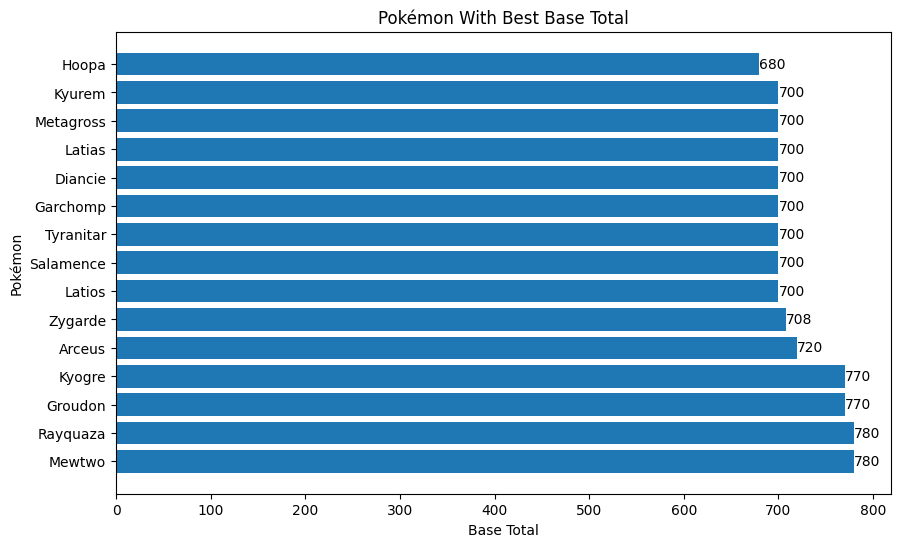

In [32]:
# Seleccionar los 10 primeros Pokémon con el mejor Base_Total
top10_pokemon_base_total = pkmn.sort_values(by="base_total", ascending=False).head(15)

# Definir una paleta de colores
palette = sns.color_palette("husl", len(top10_pokemon_base_total))

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_pokemon_base_total["name"], top10_pokemon_base_total["base_total"])

# Añadir título y etiquetas de ejes
plt.title("Pokémon With Best Base Total")
plt.xlabel("Base Total")
plt.ylabel("Pokémon")

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{int(bar.get_width())}", 
             va="center", ha="left", color="black")

# Mostrar el gráfico
plt.show()

In [33]:
pkmn.is_legendary.value_counts()

is_legendary
Non-legendary    731
Legendary         70
Name: count, dtype: int64

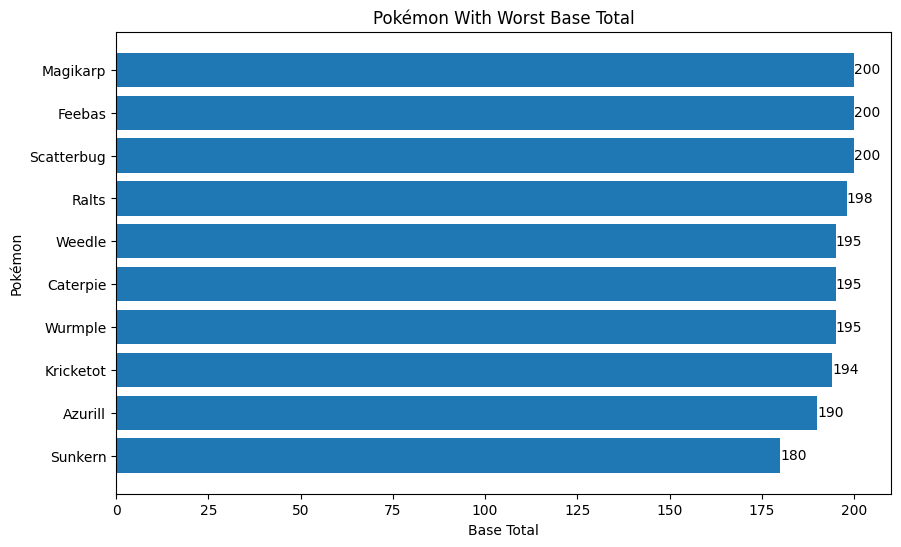

In [34]:
# Seleccionar los 10 primeros Pokémon con el peor Base_Total
top10_pokemon_base_total = pkmn.sort_values(by="base_total", ascending=True).head(10)

# Definir una paleta de colores
palette = sns.color_palette("husl", len(top10_pokemon_base_total))

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_pokemon_base_total["name"], top10_pokemon_base_total["base_total"])

# Añadir título y etiquetas de ejes
plt.title("Pokémon With Worst Base Total")
plt.xlabel("Base Total")
plt.ylabel("Pokémon")

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{int(bar.get_width())}", 
             va="center", ha="left", color="black")

# Mostrar el gráfico
plt.show()

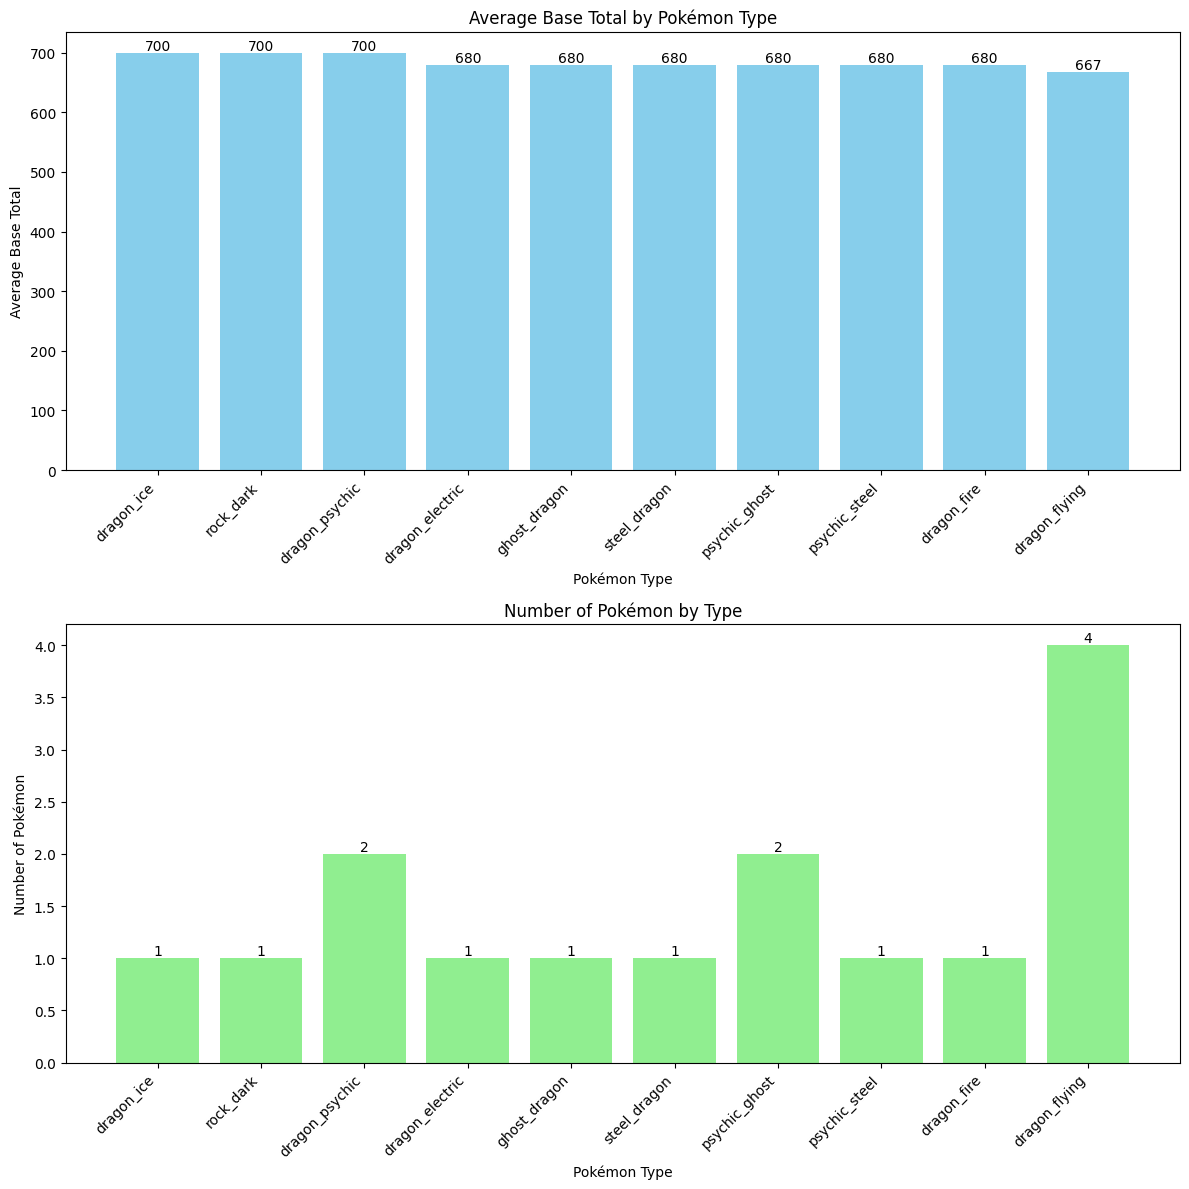

In [35]:
# Calcular el promedio de base_total por tipo
average_base_total_by_type = pkmn.groupby("type")["base_total"].mean().sort_values(ascending=False).head(10)

# Contar la cantidad de Pokémon por tipo
pokemon_count_by_type = pkmn["type"].value_counts().loc[average_base_total_by_type.index]

# Crear una figura con dos subgráficos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Graficar el promedio de base_total por tipo
bars1 = ax[0].bar(average_base_total_by_type.index, average_base_total_by_type, color="skyblue")
ax[0].set_title("Average Base Total by Pokémon Type")
ax[0].set_xlabel("Pokémon Type")
ax[0].set_ylabel("Average Base Total")

# Añadir etiquetas con los valores en cada barra
for bar in bars1:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
            ha="center", va="bottom", color="black")

# Graficar la cantidad de Pokémon por tipo
bars2 = ax[1].bar(pokemon_count_by_type.index, pokemon_count_by_type, color="lightgreen")
ax[1].set_title("Number of Pokémon by Type")
ax[1].set_xlabel("Pokémon Type")
ax[1].set_ylabel("Number of Pokémon")

# Añadir etiquetas con los valores en cada barra
for bar in bars2:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
            ha="center", va="bottom", color="black")

# Rotar las etiquetas del eje x para una mejor visualización
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

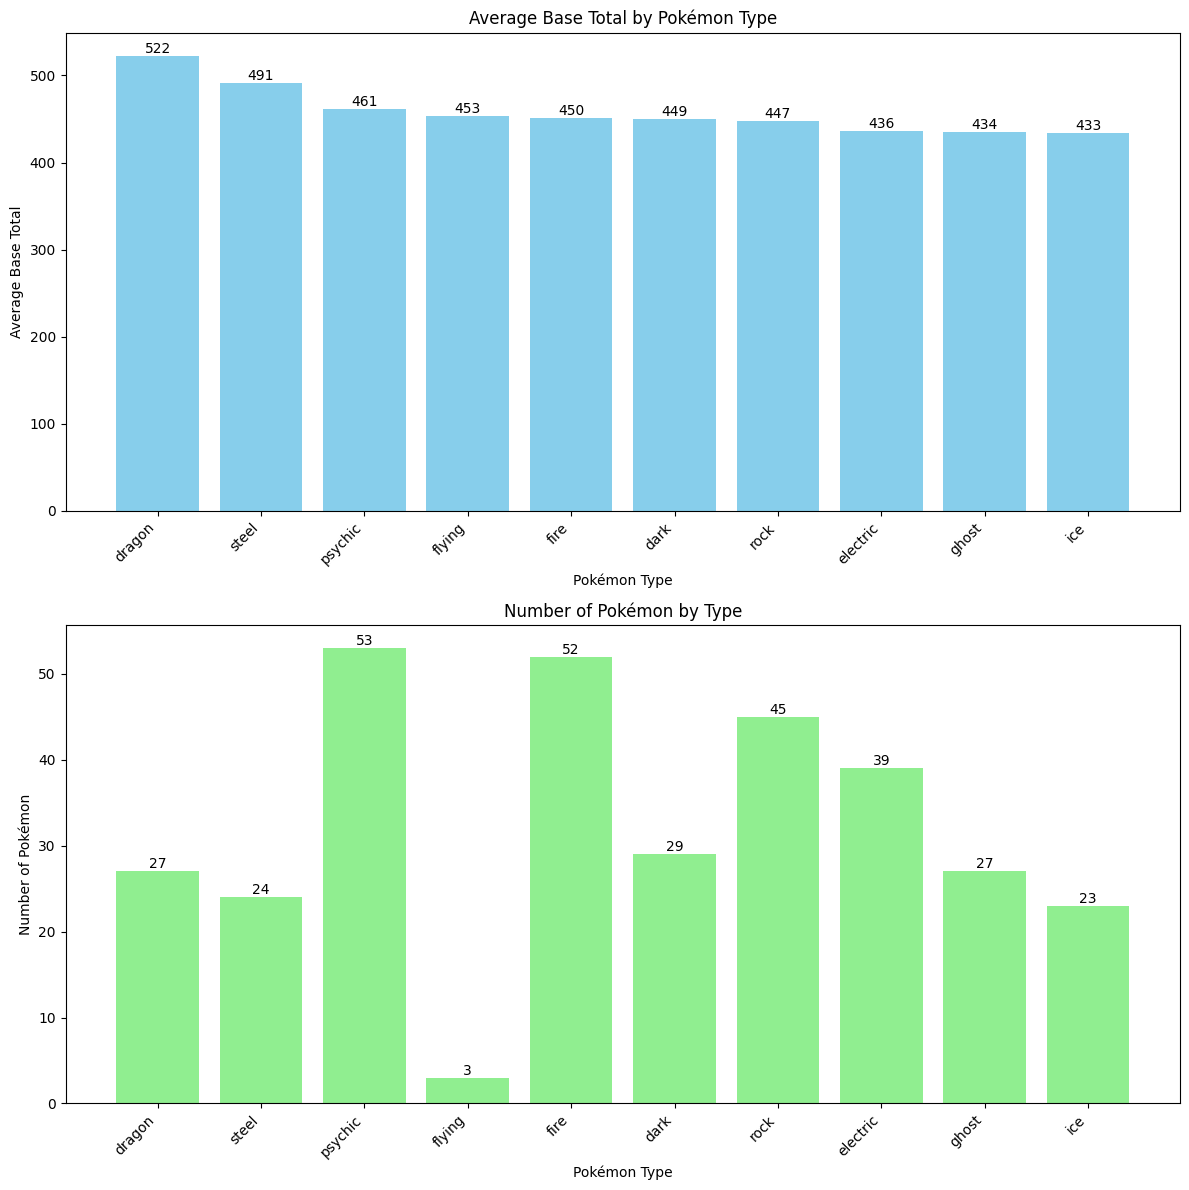

In [39]:
# Calcular el promedio de base_total por tipo
average_base_total_by_type = pkmn.groupby("type1")["base_total"].mean().sort_values(ascending=False).head(10)

# Contar la cantidad de Pokémon por tipo
pokemon_count_by_type = pkmn["type1"].value_counts().loc[average_base_total_by_type.index]

# Crear una figura con dos subgráficos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Graficar el promedio de base_total por tipo
bars1 = ax[0].bar(average_base_total_by_type.index, average_base_total_by_type, color="skyblue")
ax[0].set_title("Average Base Total by Pokémon Type")
ax[0].set_xlabel("Pokémon Type")
ax[0].set_ylabel("Average Base Total")

# Añadir etiquetas con los valores en cada barra
for bar in bars1:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
            ha="center", va="bottom", color="black")

# Graficar la cantidad de Pokémon por tipo
bars2 = ax[1].bar(pokemon_count_by_type.index, pokemon_count_by_type, color="lightgreen")
ax[1].set_title("Number of Pokémon by Type")
ax[1].set_xlabel("Pokémon Type")
ax[1].set_ylabel("Number of Pokémon")

# Añadir etiquetas con los valores en cada barra
for bar in bars2:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
            ha="center", va="bottom", color="black")

# Rotar las etiquetas del eje x para una mejor visualización
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

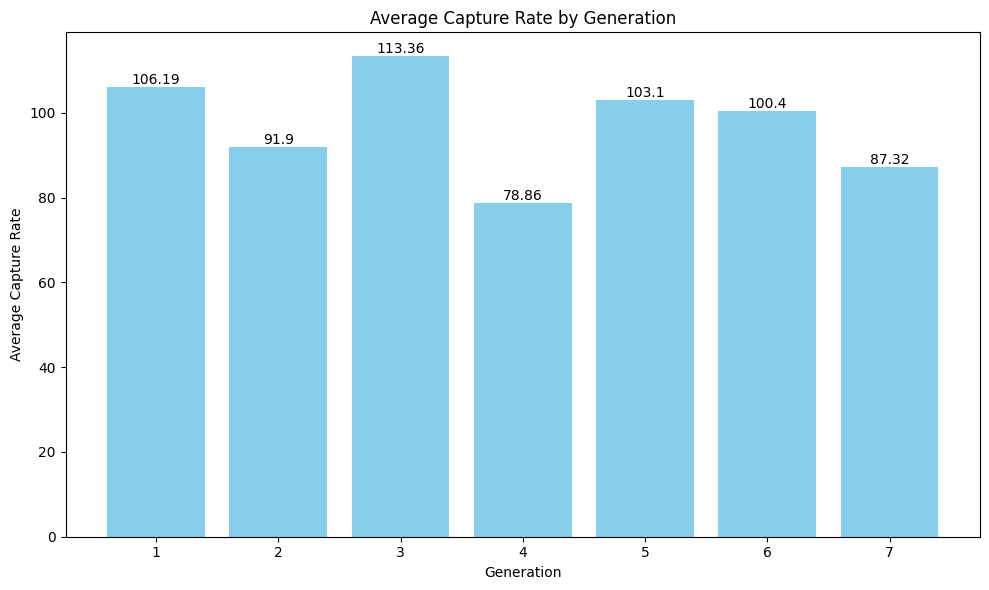

In [36]:
# Calcular el promedio de capture rate por generación
capture_rate_by_generation = pkmn.groupby("generation")["capture_rate"].mean()

# Obtener la generación con el menor capture rate
min_capture_rate_generation = capture_rate_by_generation.idxmin()
min_capture_rate_value = capture_rate_by_generation.min()

# Obtener la generación con el mayor capture rate
max_capture_rate_generation = capture_rate_by_generation.idxmax()
max_capture_rate_value = capture_rate_by_generation.max()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(capture_rate_by_generation.index, capture_rate_by_generation, color="skyblue")

# Añadir título y etiquetas de ejes
plt.title("Average Capture Rate by Generation")
plt.xlabel("Generation")
plt.ylabel("Average Capture Rate")

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha="center", va="bottom", color="black")

# Mostrar el gráfico
plt.xticks(capture_rate_by_generation.index)  # Asegurar que todos los ticks estén presentes
plt.tight_layout()
plt.show()

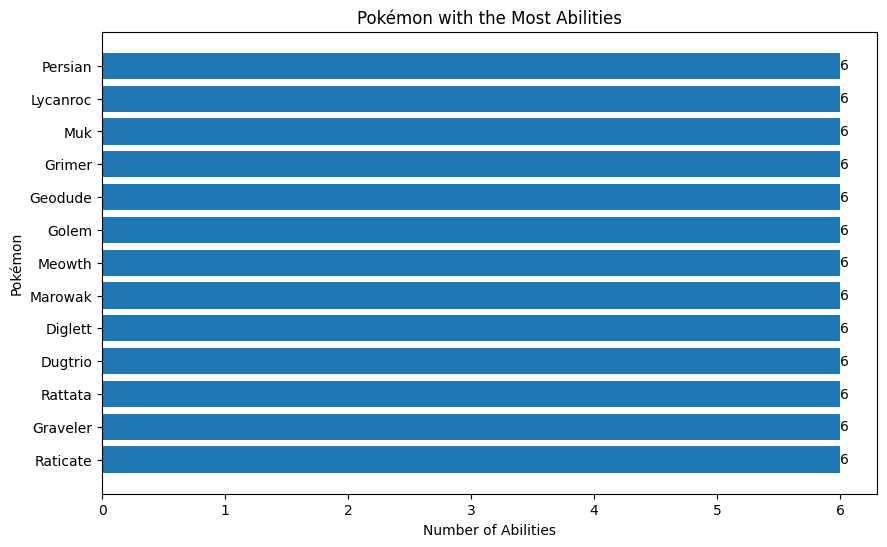

In [37]:
# Ordenar el DataFrame por la columna "num_abilities" en orden descendente
pokemon_max_abilities = pkmn.sort_values(by="num_abilities", ascending=False)

# Obtener los Pokémon con la mayor cantidad de habilidades
max_abilities = pokemon_max_abilities[pokemon_max_abilities["num_abilities"] == pokemon_max_abilities["num_abilities"].max()]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(max_abilities["name"], max_abilities["num_abilities"])

# Añadir título y etiquetas de ejes
plt.title("Pokémon with the Most Abilities")
plt.xlabel("Number of Abilities")
plt.ylabel("Pokémon")

# Mostrar el recuento de habilidades en cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{int(bar.get_width())}", 
             va="center", ha="left", color="black")

# Mostrar el gráfico
plt.show()

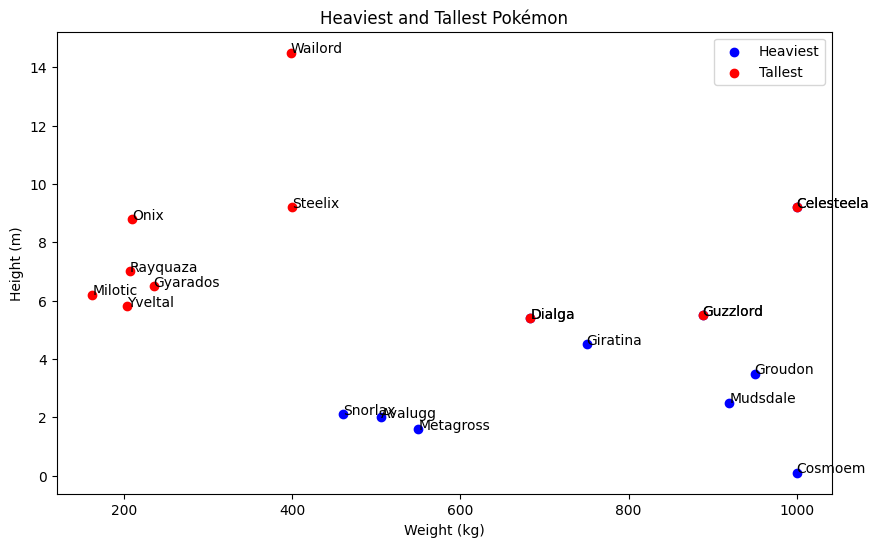

In [38]:
# Filtrar los Pokémon más pesados y más grandes
heaviest_pokemon = pkmn.nlargest(10, "weight_kg")
tallest_pokemon = pkmn.nlargest(10, "height_m")

# Crear el gráfico de dispersión para los Pokémon más pesados
plt.figure(figsize=(10, 6))
plt.scatter(heaviest_pokemon["weight_kg"], heaviest_pokemon["height_m"], color="blue", label="Heaviest")

# Añadir etiquetas para los Pokémon más pesados
for i, txt in enumerate(heaviest_pokemon["name"]):
    plt.annotate(txt, (heaviest_pokemon["weight_kg"].iloc[i], heaviest_pokemon["height_m"].iloc[i]))

# Crear el gráfico de dispersión para los Pokémon más grandes
plt.scatter(tallest_pokemon["weight_kg"], tallest_pokemon["height_m"], color="red", label="Tallest")

# Añadir etiquetas para los Pokémon más grandes
for i, txt in enumerate(tallest_pokemon["name"]):
    plt.annotate(txt, (tallest_pokemon["weight_kg"].iloc[i], tallest_pokemon["height_m"].iloc[i]))

# Añadir título y etiquetas de ejes
plt.title("Heaviest and Tallest Pokémon")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.legend()

# Mostrar el gráfico
plt.show()